In [1]:
import pandas as pd

from visualization import view_curve

## Suffix vs Non-suffix Words

In [2]:
nlexique = pd.read_csv('../data/nlexique.csv')
nlexique

,lexeme,variants,gen,sg,pl
0,à-côté,à-côté:accoté,m,akOte,akOte
1,à-coup,à-coup,m,aku,aku
2,à-peu-près,à-peu-près,m,apØpʁɛ,apØpʁɛ
3,à-pic,à-pic,m,apik,apik
4,à-plat,à-plat:aplat,m,apla,apla
...,...,...,...,...,...
31000,zurichois,zurichois,m,zyʁikwa,zyʁikwa
31001,zydeco,zydeco,f,zidəko,zidəko
31002,zygoma,zygoma,m,zigOma,zigOma
31003,zygote,zygote,m,zigɔt,zigɔt


In [3]:
echantinom = pd.read_csv('../data/Echantinom-full-20210902.csv')

echantinom = (echantinom[~echantinom['lemma'].isin(nlexique[nlexique['gen'] == 'b']['lexeme'])] # rows
                       [['lemma', 'phon', 'gen', 'suffix', 'suffix_broad', 'sfx_allomorph']]    # columns
                       .fillna(0)
                       .reset_index(drop=True)
                       )

echantinom = (pd.merge(echantinom, nlexique, left_on='lemma', right_on='lexeme', how='left', suffixes=('', '_y'))
               .drop(columns=['lexeme', 'phon', 'gen_y'])
               .dropna()
               .reset_index(drop=True)
               )
echantinom

,lemma,gen,suffix,suffix_broad,sfx_allomorph,variants,sg,pl
0,berlingue,m,0,0,0,berlingue,bɛʁlɛ̃g,bɛʁlɛ̃g
1,corton,m,on,on,ɔ̃,corton,kɔʁtɔ̃,kɔʁtɔ̃
2,dabuche,f,uche,Vche,yʃ,dabuche,dabyʃ,dabyʃ
3,faf,m,0,0,0,faf,faf,faf
4,gail,f,0,0,0,gail,gaj,gaj
...,...,...,...,...,...,...,...,...
4527,palu,m,0,0,0,palu:palus,paly,paly
4528,talc,m,0,0,0,talc,talk,talk
4529,sauvetage,m,age,age,aʒ,sauvetage,sOvətaʒ,sOvətaʒ
4530,plaid,m,0,0,0,plaid,plɛd,plɛd


### Orthographic forms

In [4]:
orth_preds = pd.read_csv('../results/echantinom_orth_preds.csv')
# orth_preds = orth_preds.join(echantinom.set_index('lemma')[['suffix']], on='Form').drop_duplicates().reset_index(drop=True)
orth_preds

,Form,Alt Form,Predicted Gender,True Gender,Class Probabilities,Set,suffix
0,bi,bi,m,m,"[('i', {'f': 0.10226600617170334, 'm': 0.89773...",test,0
1,as,as,m,m,"[('s', {'f': 0.2900664508342743, 'm': 0.709933...",test,0
2,an,ɑ̃,m,m,"[('n', {'f': 0.6975879669189453, 'm': 0.302412...",test,0
3,té,te,m,m,"[('é', {'f': 0.21048486232757568, 'm': 0.78951...",test,0
4,mob,mɔb,m,f,"[('b', {'f': 0.24886830151081085, 'm': 0.75113...",test,0
...,...,...,...,...,...,...,...
4526,sous-alimentation,suzalimɑ̃tasjɔ̃,f,f,"[('n', {'f': 0.6975879669189453, 'm': 0.302412...",test,ion
4527,approvisionnement,apʁOvizjɔnəmɑ̃,m,m,"[('t', {'f': 0.33767399191856384, 'm': 0.66232...",test,ment
4528,cul-de-basse-fosse,kydəbasəfos,m,m,"[('e', {'f': 0.21346718072891235, 'm': 0.78653...",test,0
4529,transsubstantiation,tʁɑ̃ssypstɑ̃tjasjɔ̃,f,f,"[('n', {'f': 0.6975879669189453, 'm': 0.302412...",test,ion


In [5]:
orth_correct = orth_preds[orth_preds['Predicted Gender'] == orth_preds['True Gender']]

orth_percentage_correct = (orth_correct.shape[0] / orth_preds.shape[0]) * 100
orth_percentage_correct


90.75259324652394

In [6]:
incorrect = orth_preds[orth_preds['Predicted Gender'] != orth_preds['True Gender']]
incorrect.sample(5)

,Form,Alt Form,Predicted Gender,True Gender,Class Probabilities,Set,suffix
549,tripe,tʁip,m,f,"[('e', {'f': 0.21346718072891235, 'm': 0.78653...",test,0
1496,guiche,giʃ,m,f,"[('e', {'f': 0.21346718072891235, 'm': 0.78653...",test,0
3524,macfarlane,makfaʁlan,f,m,"[('e', {'f': 0.21346718072891235, 'm': 0.78653...",test,0
1840,ventôse,vɑ̃toz,f,m,"[('e', {'f': 0.21346718072891235, 'm': 0.78653...",test,ôse
832,barre,baʁ,m,f,"[('e', {'f': 0.21346718072891235, 'm': 0.78653...",test,0


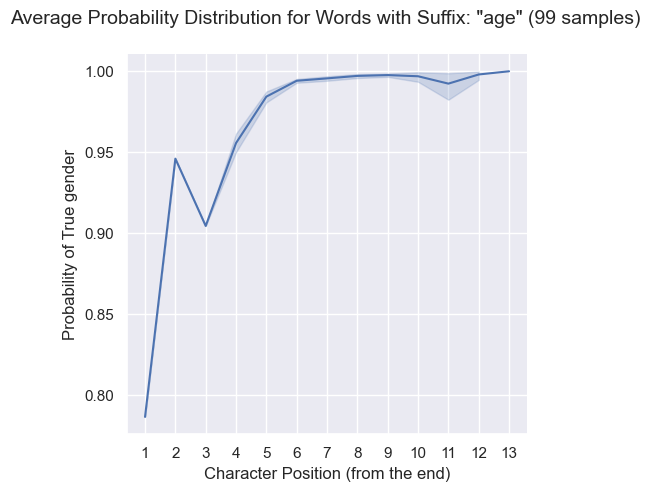

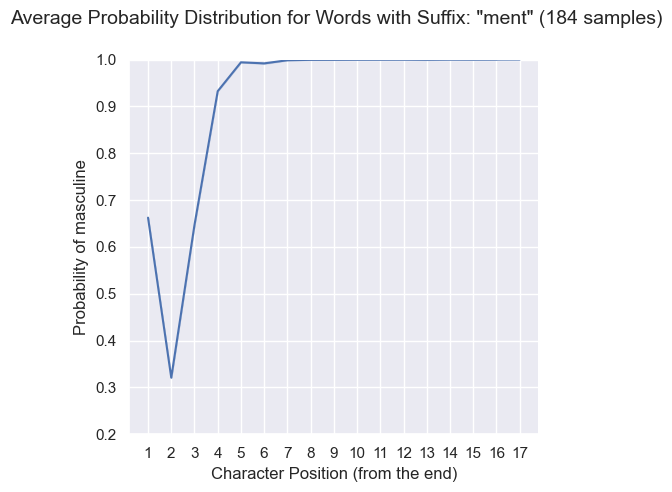

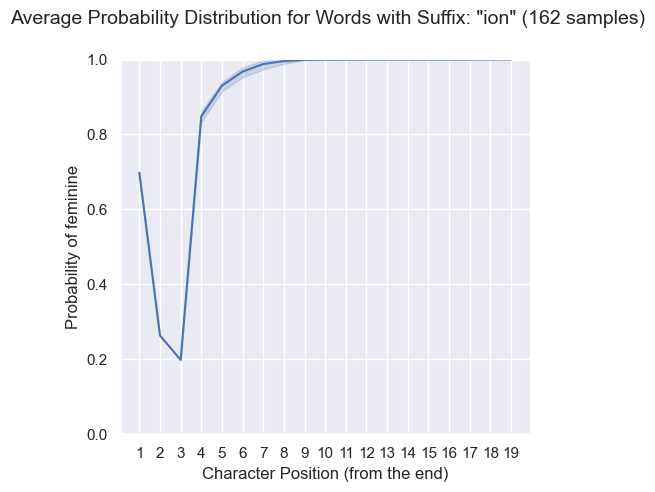

In [7]:
"""Uncomment to view the curves of individual example words"""
"""
Possible values for scale: 
- True (scales from 0 to 1), 
- False (default behavior), 
- List[int|float, int|float]: custom scaling range
"""

# view_curve(['passage'], orth_preds, binary=True, gender='f', display_probs=True, scale=False)
# print('-' * 100 + '\n')
# view_curve(['lignage'], orth_preds, binary=True, gender='f')
# print('-' * 100 + '\n')
# view_curve(['bâtiment'], orth_preds, binary=True, gender='f')
# print('-' * 100 + '\n')
# view_curve(['virement'], orth_preds, binary=True, gender='f')
# print('-' * 100 + '\n')
# view_curve(['formation'], orth_preds, binary=True, gender='f')
# print('-' * 100 + '\n')
# view_curve(['gradation'], orth_preds, binary=True, gender='f')

suffix_avg_plot(orth_preds, 'age', 'True', scale=False)
suffix_avg_plot(orth_preds, 'ment', 'm', scale=[0.2, 1])
suffix_avg_plot(orth_preds, 'ion', 'f', scale=True)

In [8]:
orth_preds_x10 = pd.read_csv('../results/echantinom_orth_preds_x10.csv')
# orth_preds_x10 = orth_preds_x10.join(echantinom.set_index('lemma')[['suffix']], on='Form').drop_duplicates().reset_index(drop=True)

In [9]:
"""Uncomment to view the curves of an example word at each run"""

# view_curve(['gradation'], orth_preds_x10, binary=True, gender='True', multiruns=True, display_probs=True, scale=[0, 1.1])

'Uncomment to view the curves of an example word at each run'

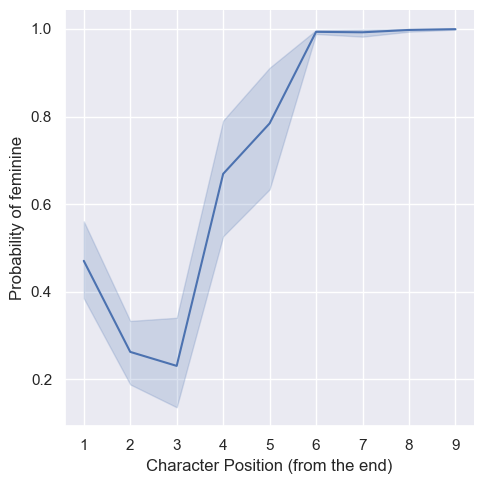

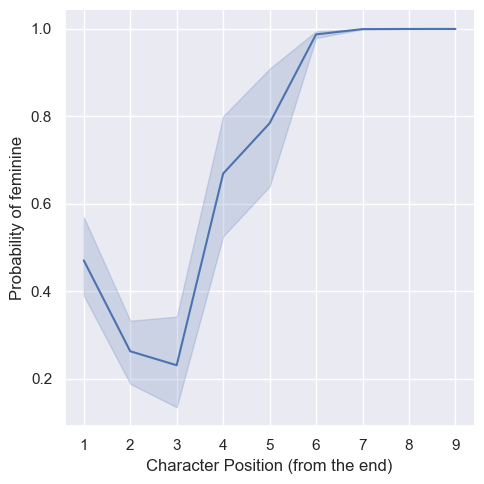

In [10]:
"""Average curve of an example word over multiple runs"""

suffix_avg_plot(orth_preds_x10.query("Form == 'gradation'"), 'ion', gender='f', title=False)
suffix_avg_plot(orth_preds_x10.query("Form == 'sensation'"), 'ion', gender='f', title=False)

### Phonetic forms

In [11]:
phon_preds = pd.read_csv('../results/echantinom_phon_preds.csv')
# phon_preds = (phon_preds.join(echantinom.set_index('sg')[['suffix']], on='Form')
#               .drop_duplicates('Alt Form')
#               .reset_index(drop=True)
#               )
phon_preds

,Form,Alt Form,Predicted Gender,True Gender,Class Probabilities,Set,suffix
0,u,houx,m,m,"[('u', {'f': 0.5169596672058105, 'm': 0.483040...",test,0
1,ɛ,ais,m,f,"[('ɛ', {'f': 0.29274383187294006, 'm': 0.70725...",test,0
2,ɛ,haie,m,f,"[('ɛ', {'f': 0.29274383187294006, 'm': 0.70725...",test,0
3,o,eau,m,f,"[('o', {'f': 0.6822937726974487, 'm': 0.317706...",test,0
4,œj,oeil,m,m,"[('j', {'f': 0.24457314610481262, 'm': 0.75542...",test,0
...,...,...,...,...,...,...,...
4526,ɛ̃sybɔʁdinasjɔ̃,insubordination,f,f,"[('̃', {'f': 0.49001044034957886, 'm': 0.50998...",test,ion
4527,tʁɑ̃splɑ̃tasjɔ̃,transplantation,f,f,"[('̃', {'f': 0.49001044034957886, 'm': 0.50998...",test,ion
4528,kɔ̃fidɑ̃sjalite,confidentialité,f,f,"[('e', {'f': 0.48355355858802795, 'm': 0.51644...",test,ité
4529,ɛ̃kɔ̃patibilite,incompatibilité,f,f,"[('e', {'f': 0.48355355858802795, 'm': 0.51644...",test,ité


In [12]:
phon_correct = phon_preds[phon_preds['Predicted Gender'] == phon_preds['True Gender']]

phon_percentage_correct = (phon_correct.shape[0] / phon_preds.shape[0]) * 100
phon_percentage_correct


77.51048333701169

In [13]:
phon_incorrect = phon_preds[phon_preds['Predicted Gender'] != phon_preds['True Gender']]
phon_incorrect.sample(5)

,Form,Alt Form,Predicted Gender,True Gender,Class Probabilities,Set,suffix
3133,patʁOna,patronat,f,m,"[('a', {'f': 0.5750579237937927, 'm': 0.424942...",test,at
3044,tɔʁtija,tortilla,m,f,"[('a', {'f': 0.5750579237937927, 'm': 0.424942...",test,0
2663,fabʁik,fabrique,m,f,"[('k', {'f': 0.40308481454849243, 'm': 0.59691...",test,0
3337,sakʁilɛʒ,sacrilège,f,m,"[('ʒ', {'f': 0.3404069244861603, 'm': 0.659593...",test,0
2849,utʁəmɛʁ,outremer,f,m,"[('ʁ', {'f': 0.35251420736312866, 'm': 0.64748...",test,0


In [14]:
phon_preds[phon_preds['Alt Form'].isin(['passage', 'lignage', 'bâtiment', 'virement', 'formation', 'gradation'])]

,Form,Alt Form,Predicted Gender,True Gender,Class Probabilities,Set,suffix
1226,pasaʒ,passage,m,m,"[('ʒ', {'f': 0.3404069244861603, 'm': 0.659593...",test,age
1526,liɲaʒ,lignage,m,m,"[('ʒ', {'f': 0.3404069244861603, 'm': 0.659593...",test,age
2810,batimɑ̃,bâtiment,m,m,"[('̃', {'f': 0.49001044034957886, 'm': 0.50998...",test,ment
3148,viʁəmɑ̃,virement,m,m,"[('̃', {'f': 0.49001044034957886, 'm': 0.50998...",test,ment
3817,gʁadasjɔ̃,gradation,f,f,"[('̃', {'f': 0.49001044034957886, 'm': 0.50998...",test,ion
3826,fɔʁmasjɔ̃,formation,f,f,"[('̃', {'f': 0.49001044034957886, 'm': 0.50998...",test,ion


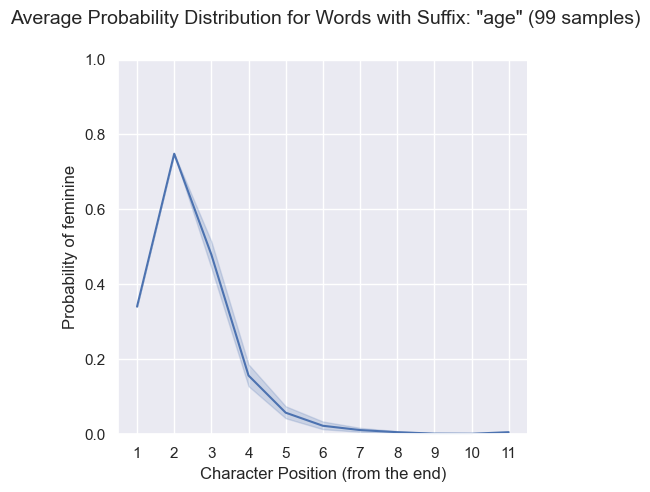

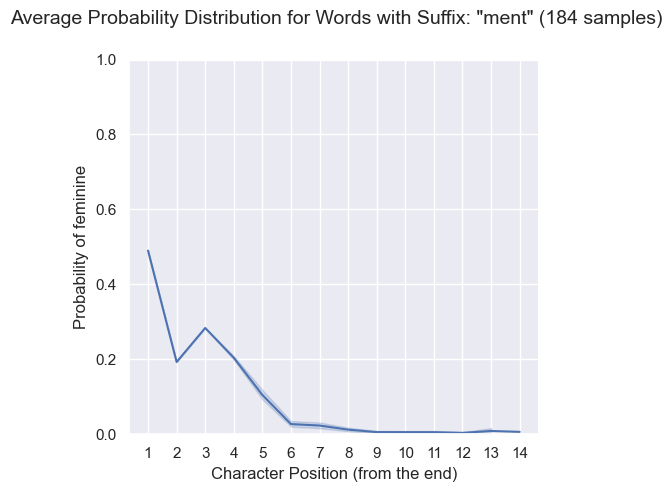

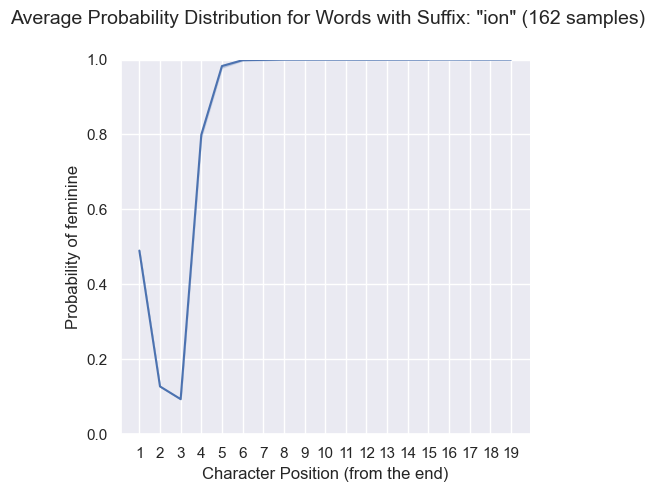

In [15]:
"""Uncomment to view the curves of individual example words"""

# view_curve(['pasaʒ'], phon_preds, binary=True, gender='f', scale=True)
# print('-' * 100 + '\n')
# view_curve(['liɲaʒ'], phon_preds, binary=True, gender='f', scale=True)
# print('-' * 100 + '\n')
# view_curve(['batimɑ̃'], phon_preds, binary=True, gender='f', scale=True)
# print('-' * 100 + '\n')
# view_curve(['viʁəmɑ̃'], phon_preds, binary=True, gender='f', scale=True)
# print('-' * 100 + '\n')
# view_curve(['fɔʁmasjɔ̃'], phon_preds, binary=True, gender='f', scale=True)
# print('-' * 100 + '\n')
# view_curve(['gʁadasjɔ̃'], phon_preds, binary=True, gender='f', scale=True)

suffix_avg_plot(phon_preds, 'age', gender='f', scale=True)
suffix_avg_plot(phon_preds, 'ment', gender='f', scale=True)
suffix_avg_plot(phon_preds, 'ion', gender='f', scale=True)

In [16]:
phon_preds_x10 = pd.read_csv('../results/echantinom_phon_preds_x10.csv')
# phon_preds_x10 = (phon_preds_x10.join(echantinom.set_index('sg')[['suffix']], on='Form')
#                   .drop_duplicates()
#                   .reset_index(drop=True)
#                   )

In [17]:
"""Uncomment to view the curves of an example word at each run"""

# view_curve(['gʁadasjɔ̃'], phon_preds_x10, binary=True, gender='f', multiruns=True)

'Uncomment to view the curves of an example word at each run'

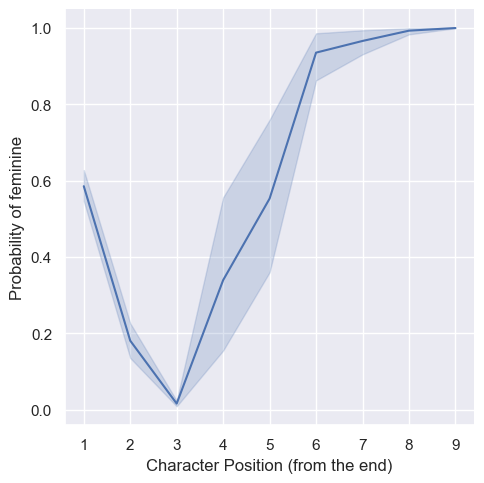

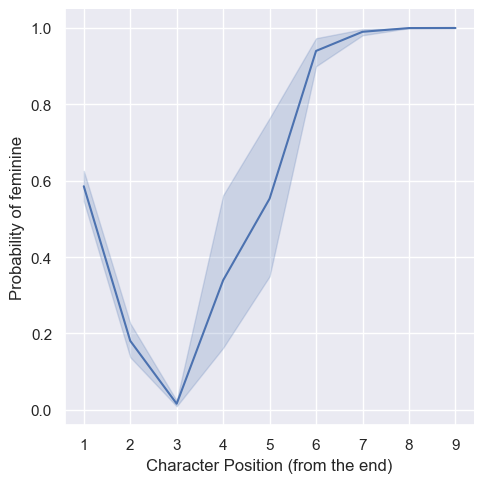

In [18]:
"""Average curve of an example word over multiple runs"""

suffix_avg_plot(phon_preds_x10.query("Form == 'gʁadasjɔ̃'"), 'ion', gender='f', title=False)
suffix_avg_plot(phon_preds_x10.query("Form == 'fɔʁmasjɔ̃'"), 'ion', gender='f', title=False)

In [19]:
# [word for word in orth_preds_x10['Form'].tolist() if word.endswith('tion')]

### Comparing plots of multiple words

Run 1 of 10:


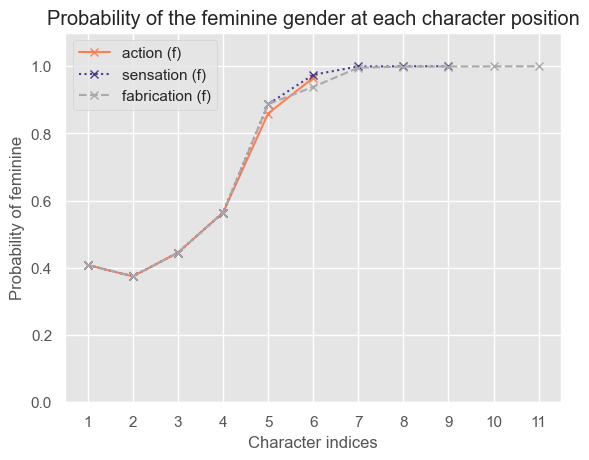

Run 2 of 10:


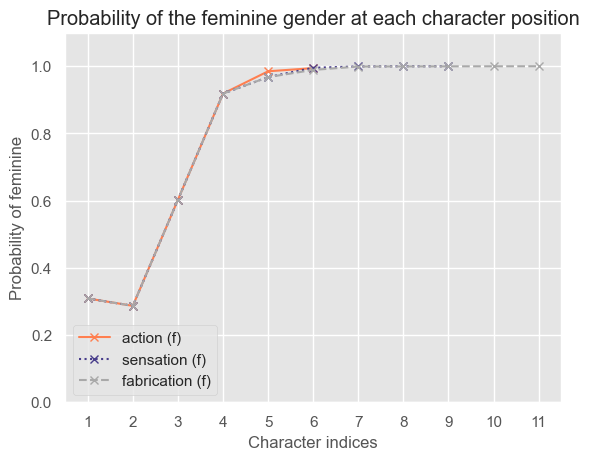

Run 3 of 10:


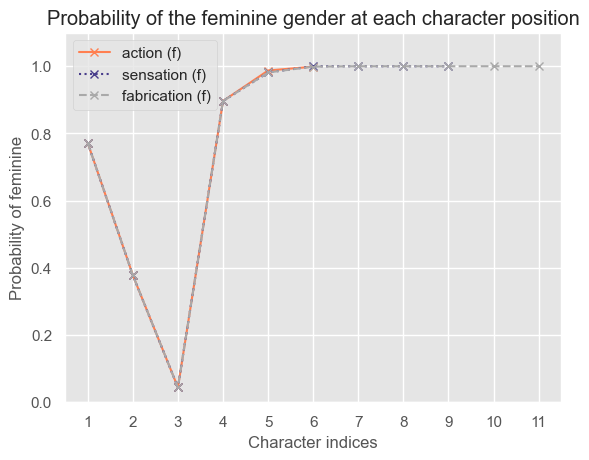

Run 4 of 10:


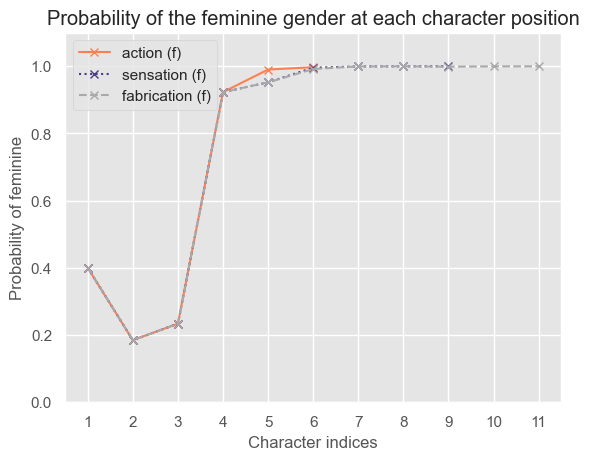

Run 5 of 10:


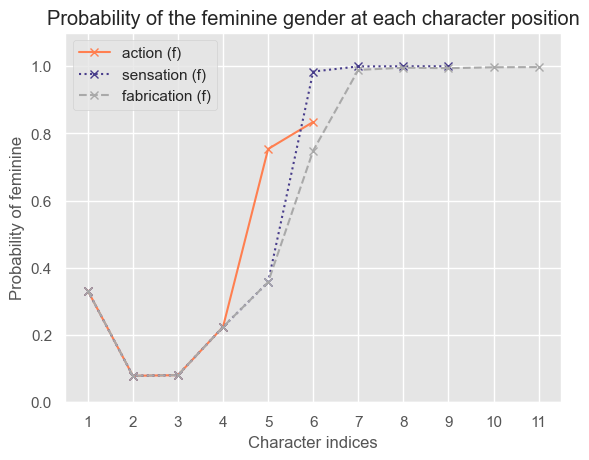

Run 6 of 10:


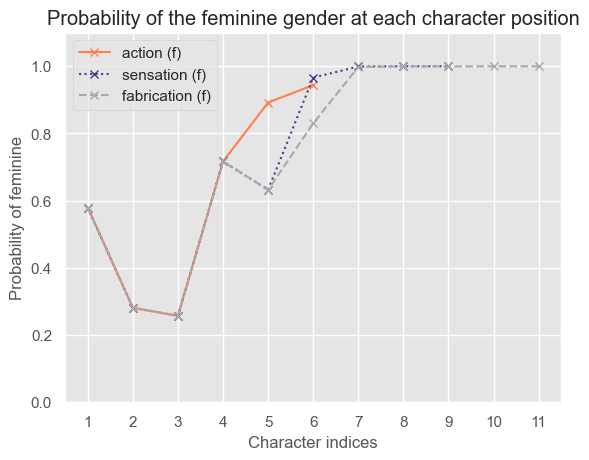

Run 7 of 10:


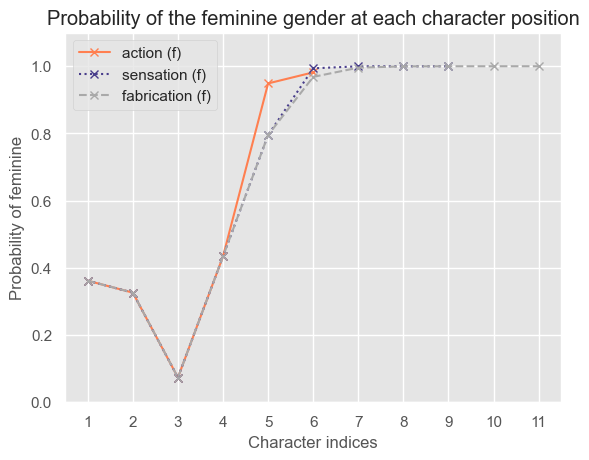

Run 8 of 10:


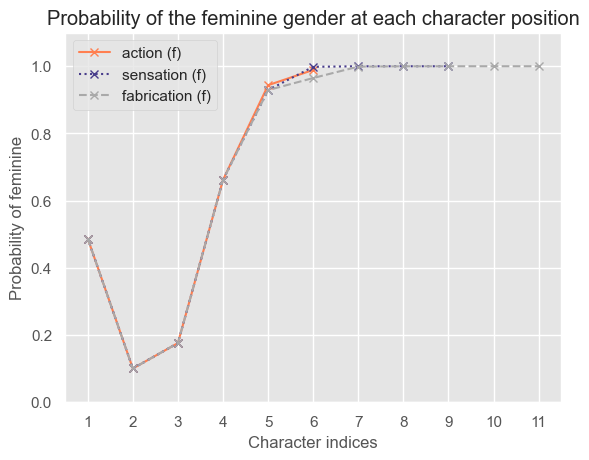

Run 9 of 10:


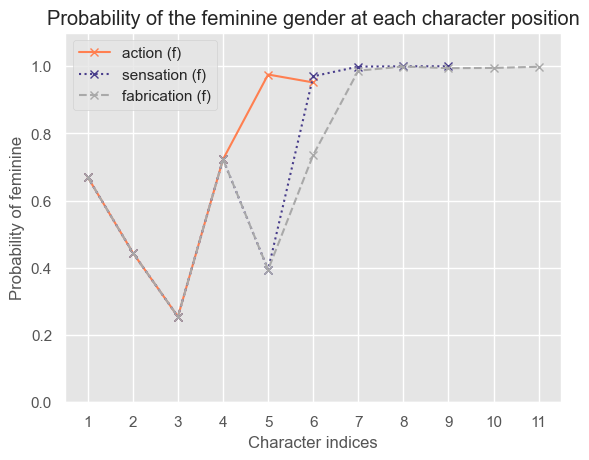

Run 10 of 10:


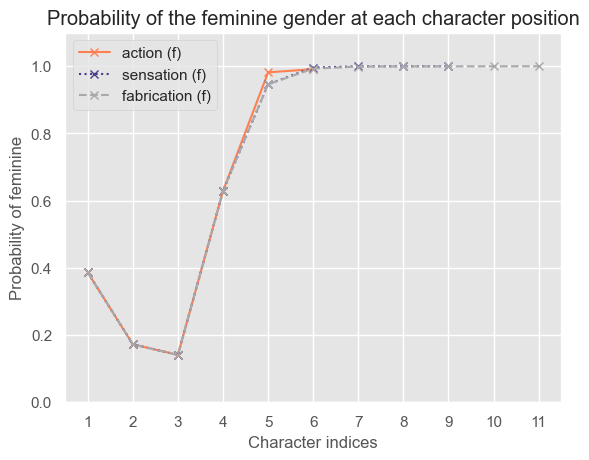

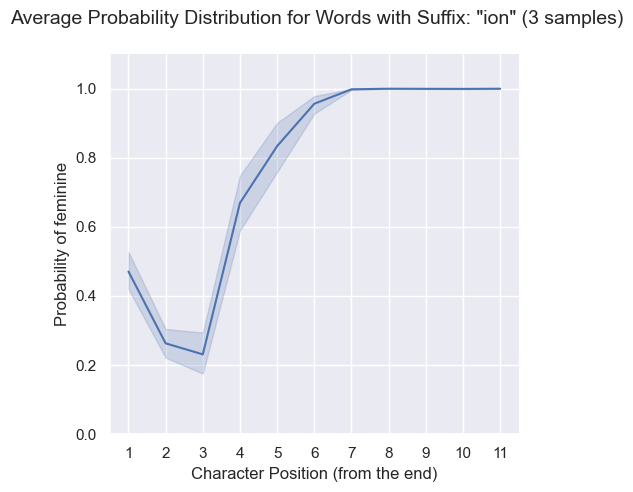

In [20]:
# view_curve(['emballage', 'repassage', 'nettoyage'], orth_preds_x10, binary=True, gender='m', multiruns=True, scale=[0, 1.1])
# suffix_avg_plot(orth_preds_x10.query("Form in ['emballage', 'repassage', 'nettoyage']"), 'age', gender='m', scale=[0, 1.1])

view_curve(['action', 'sensation', 'fabrication'], orth_preds_x10, binary=True, gender='f', multiruns=True, scale=[0, 1.1])
suffix_avg_plot(orth_preds_x10.query("Form in ['action', 'sensation', 'fabrication']"), 'ion', gender='f', scale=[0, 1.1])